# **Lab4**: Automatic Extractive Text Summarization


This lab aims at discovering and recognizing the process of some
Automatic Extractive Text Summarization algorithms using
Python.

In [12]:
import re
import math
import operator
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize,word_tokenize
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
Stopwords = set(stopwords.words('english'))
from nltk.translate.bleu_score import sentence_bleu
import math
import operator
import string
import numpy as np
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
DOCUMENT = """Tunisia officially the Republic of Tunisia is a country in the
Maghreb region of North Africa, covering 163,610 square kilometres (63,170 square
miles). Its northernmost point, Cape Angela, is also the northernmost point on
the African continent.
Tunisia is bordered by Algeria to the west and southwest, Libya to the
southeast, and the Mediterranean Sea to the north and east.
Tunisia's population was 11.5 million in 2017.Tunisia's name is derived from its
capital city, Tunis (Berber native name: Tunest), which is located on its
northeast coast.
Geographically, Tunisia contains the eastern end of the Atlas Mountains, and the
northern reaches of the Sahara desert.
Much of the rest of the country's land is fertile soil. Its 1,300 kilometres (810
miles) of coastline include the African conjunction of
the western and eastern parts of the Mediterranean Basin and, by means of the
Sicilian Strait and Sardinian Channel, feature the African mainland's
second and third nearest points to Europe after Gibraltar. """

# Text Summarization using TFIDF

In [6]:

def remove_special_characters(text):
  regex = r'[^a-zA-Z0-9\s]'
  text = re.sub(regex,'',text)
  return text
def freq(words):
  words = [word.lower() for word in words]
  dict_freq = {}
  words_unique = []
  for word in words:
    if word not in words_unique:
      words_unique.append(word)
  for word in words_unique:
    dict_freq[word] = words.count(word)
  return dict_freq
def pos_tagging(text):
  pos_tag = nltk.pos_tag(text.split())
  pos_tagged_noun_verb = []
  for word,tag in pos_tag:
    if tag == "NN" or tag == "NNP" or tag == "NNS" or tag == "VB" or tag == "VBD" or tag == "VBG" or tag == "VBN" or tag == "VBP" or tag == "VBZ":
      pos_tagged_noun_verb.append(word)
  return pos_tagged_noun_verb
def tf_score(word,sentence):
  word_frequency_in_sentence = 0
  len_sentence = len(sentence)
  for word_in_sentence in sentence.split():
    if word == word_in_sentence:
      word_frequency_in_sentence = word_frequency_in_sentence + 1
  tf = word_frequency_in_sentence/ len_sentence
  return tf
def idf_score(no_of_sentences,word,sentences):
  no_of_sentence_containing_word = 0
  for sentence in sentences:
    sentence = remove_special_characters(str(sentence))
    sentence = re.sub(r'\d+', '', sentence)
    sentence = sentence.split()
    sentence = [word for word in sentence if word.lower() not in Stopwords and len(word)>1]
    sentence = [word.lower() for word in sentence]
    if word in sentence:
      no_of_sentence_containing_word = no_of_sentence_containing_word + 1
  idf = math.log10(no_of_sentences/no_of_sentence_containing_word)
  return idf
def tf_idf_score(tf,idf):
  return tf*idf
def word_tfidf(dict_freq,word,sentences,sentence):
  tf = tf_score(word,sentence)
  idf = idf_score(len(sentences),word,sentences)
  tf_idf = tf_idf_score(tf,idf)
  return tf_idf
def sentence_importance(sentence,dict_freq,sentences):
  sentence_score = 0
  sentence = remove_special_characters(str(sentence))
  pos_tagged_sentence = []
  pos_tagged_sentence = pos_tagging(sentence)
  for word in pos_tagged_sentence:
    if word.lower() not in Stopwords and word not in Stopwords and len(word)>1:
      word = word.lower()
      sentence_score = sentence_score + word_tfidf(dict_freq,word,sentences,sentence)
  return sentence_score
text = DOCUMENT
tokenized_sentence = sent_tokenize(text)
text = remove_special_characters(str(text))
tokenized_words_with_stopwords = word_tokenize(text)
tokenized_words = [word for word in tokenized_words_with_stopwords if word not in
Stopwords]
tokenized_words = [word for word in tokenized_words if len(word) > 1]
tokenized_words = [word.lower() for word in tokenized_words]
word_freq = freq(tokenized_words)
no_of_sentences = 3
print("Number of sentences :",no_of_sentences)
c = 1
sentence_with_importance = {}
for sent in tokenized_sentence:
  sentenceimp = sentence_importance(sent,word_freq,tokenized_sentence)
  sentence_with_importance[c] = sentenceimp
  c = c+1
sentence_with_importance = sorted(sentence_with_importance.items(),
key=operator.itemgetter(1),reverse=True)
cnt = 0
summary = []
sentence_no = []
for word_prob in sentence_with_importance:
  if cnt < no_of_sentences:
    sentence_no.append(word_prob[0])
    cnt = cnt+1
  else:
    break
sentence_no.sort()
cnt = 0
for sentence in tokenized_sentence:
  if cnt in sentence_no:
    summary.append(sentence)
  cnt = cnt+1
summary = " ".join(summary)
print("\n************** Summary: *****************\n")
print(summary)

Number of sentences : 3

************** Summary: *****************

Tunisia is bordered by Algeria to the west and southwest, Libya to the
southeast, and the Mediterranean Sea to the north and east. Geographically, Tunisia contains the eastern end of the Atlas Mountains, and the
northern reaches of the Sahara desert. Its 1,300 kilometres (810
miles) of coastline include the African conjunction of
the western and eastern parts of the Mediterranean Basin and, by means of the
Sicilian Strait and Sardinian Channel, feature the African mainland's
second and third nearest points to Europe after Gibraltar.


In [8]:
reference = DOCUMENT
candidate = summary
score = sentence_bleu(reference, candidate)
print(score)

0.5317059802521721


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


# Text Summarization using TextRank Algorithm

Total Sentences: 7
[[1.   0.   0.11 0.04 0.06 0.07 0.07]
 [0.   1.   0.   0.   0.   0.   0.11]
 [0.11 0.   1.   0.03 0.04 0.   0.04]
 [0.04 0.   0.03 1.   0.03 0.   0.  ]
 [0.06 0.   0.04 0.03 1.   0.   0.04]
 [0.07 0.   0.   0.   0.   1.   0.  ]
 [0.07 0.11 0.04 0.   0.04 0.   1.  ]]
[0, 2, 6]
Tunisia officially the Republic of Tunisia is a country in the
Maghreb region of North Africa, covering 163,610 square kilometres (63,170 square
miles).
Tunisia is bordered by Algeria to the west and southwest, Libya to the
southeast, and the Mediterranean Sea to the north and east.
Its 1,300 kilometres (810
miles) of coastline include the African conjunction of
the western and eastern parts of the Mediterranean Basin and, by means of the
Sicilian Strait and Sardinian Channel, feature the African mainland's
second and third nearest points to Europe after Gibraltar.
summary:
 Tunisia officially the Republic of Tunisia is a country in the
Maghreb region of North Africa, covering 163,610 square kil

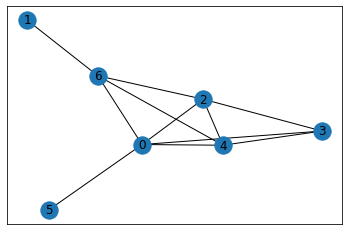

In [26]:

# normalize the document
def parse_document(document):
  document = document.strip()
  sentences = nltk.sent_tokenize(document)
  sentences = [sentence.strip() for sentence in sentences]
  return sentences
def tokenize_text(text):
  tokens = nltk.word_tokenize(text)
  tokens = [token.strip() for token in tokens]
  return tokens
def remove_special_characters(text):
  tokens = tokenize_text(text)
  pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
  filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens])
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text
def remove_stopwords(text):
  tokens = tokenize_text(text)
  filtered_tokens = [token for token in tokens if token not in
  stopword_list]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text
def normalize_corpus(corpus, tokenize=False):
  normalized_corpus = []
  for text in corpus:
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    normalized_corpus.append(text)
    if tokenize:
      text = tokenize_text(text)
      normalized_corpus.append(text)
  return normalized_corpus

sentences = parse_document(DOCUMENT)
norm_sentences = normalize_corpus(sentences,tokenize=False)
print ("Total Sentences:", len(norm_sentences))
# define number of sentences in final summary
num_sentences = 3
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def build_feature_matrix(documents, feature_type='frequency'):
  feature_type = feature_type.lower().strip()
  if feature_type == 'frequency':
    vectorizer = CountVectorizer()
  elif feature_type == 'tfidf':
    vectorizer = TfidfVectorizer()
  else:
    raise Exception("Wrong feature type entered. Possible values: 'frequency', 'tfidf'")
  feature_matrix = vectorizer.fit_transform(documents).astype(float)
  return vectorizer, feature_matrix
# construct weighted document term matrix
vec, dt_matrix = build_feature_matrix(norm_sentences,
feature_type='tfidf')
# construct the document similarity matrix
similarity_matrix = (dt_matrix * dt_matrix.T)
# view the document similarity matrix
print (np.round(similarity_matrix.todense(), 2))
from networkx import *
# build the similarity graph
similarity_graph = networkx.from_scipy_sparse_matrix(similarity_matrix)
# view the similarity graph
networkx.draw_networkx(similarity_graph)
# compute pagerank scores for all the sentences
scores = networkx.pagerank(similarity_graph)
# rank sentences based on their scores
ranked_sentences = sorted(((score, index) for index, score in scores.items()),reverse=True)
# view the ranked sentences
ranked_sentences
# get the top sentence indices for our summary
top_sentence_indices = [ranked_sentences[index][1] for index in range(num_sentences)]
top_sentence_indices.sort()
# view the top sentence indices
print (top_sentence_indices)
# construct the document summary
for index in top_sentence_indices:
  print (sentences[index])
def textrank_text_summarizer(documents, num_sentences=3,feature_type='frequency'):
  text=''
  vec, dt_matrix = build_feature_matrix(norm_sentences,
  feature_type='tfidf')
  similarity_matrix = (dt_matrix * dt_matrix.T)
  similarity_graph = networkx.from_scipy_sparse_matrix(similarity_matrix)
  scores = networkx.pagerank(similarity_graph)
  ranked_sentences = sorted(((score, index) for index, score in scores.items()),reverse=True)
  top_sentence_indices = [ranked_sentences[index][1] for index in range(num_sentences)]
  top_sentence_indices.sort()
  for index in top_sentence_indices:
    #print (sentences[index])
    text+=' '+sentences[index]
    return text
print("summary:")
summary=textrank_text_summarizer(norm_sentences, num_sentences=3, feature_type='tfidf')
print(summary)

In [27]:
reference = DOCUMENT
candidate = summary
score = sentence_bleu(reference, candidate)
print(score)

0.7012575875367208


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


# Text Summarization using LSA (Latent Semantic Analysis) Algorithm

In [28]:

# normalize the document
def parse_document(document):
  document = document.strip()
  sentences = nltk.sent_tokenize(document)
  sentences = [sentence.strip() for sentence in sentences]
  return sentences
def tokenize_text(text):
  tokens = nltk.word_tokenize(text)
  tokens = [token.strip() for token in tokens]
  return tokens
def remove_special_characters(text):
  tokens = tokenize_text(text)
  pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
  filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens])
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text
def remove_stopwords(text):
  tokens = tokenize_text(text)
  filtered_tokens = [token for token in tokens if token not in
  stopword_list]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text
def normalize_corpus(corpus, tokenize=False):
  normalized_corpus = []
  for text in corpus:
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    normalized_corpus.append(text)
    if tokenize:
      text = tokenize_text(text)
      normalized_corpus.append(text)
  return normalized_corpus

sentences = parse_document(DOCUMENT)
norm_sentences = normalize_corpus(sentences,tokenize=False)
print ("Total Sentences:", len(norm_sentences))
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def build_feature_matrix(documents, feature_type='frequency'):
  feature_type = feature_type.lower().strip()
  if feature_type == 'frequency':
    vectorizer = CountVectorizer()
  elif feature_type == 'tfidf':
    vectorizer = TfidfVectorizer()
  else:
    raise Exception("Wrong feature type entered. Possible values: 'frequency', 'tfidf'")
  feature_matrix = vectorizer.fit_transform(documents).astype(float)
  return vectorizer, feature_matrix
# set the number of sentences and topics for summarized document
num_sentences = 3
num_topics = 3
# build document term matrix based on bag of words features
vec, dt_matrix = build_feature_matrix(sentences,
feature_type='frequency')
# convert to term document matrix
td_matrix = dt_matrix.transpose()
td_matrix = td_matrix.multiply(td_matrix > 0)
from scipy.sparse.linalg import svds
def low_rank_svd(matrix, singular_count=2):
  u, s, vt = svds(matrix, k=singular_count)
  return u, s, vt
# get low rank SVD components
u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)
# remove singular values below threshold
sv_threshold = 0.5
min_sigma_value = max(s) * sv_threshold
s[s < min_sigma_value] = 0
# compute salience scores for all sentences in document
salience_scores = np.sqrt(np.dot(np.square(s), np.square(vt)))
# print salience score for each sentence
print (np.round(salience_scores, 2))
# rank sentences based on their salience scores
top_sentence_indices = salience_scores.argsort()[-num_sentences:][::-1]
top_sentence_indices.sort()
# view top sentence index positions
print (top_sentence_indices)
# get document summary by combining above sentences
for index in top_sentence_indices:
  print (sentences[index])
def lsa_text_summarizer(documents, num_sentences=2,num_topics=2, feature_type='frequency',sv_threshold=0.5):
  text=''
  vec, dt_matrix = build_feature_matrix(documents,
  feature_type=feature_type)
  td_matrix = dt_matrix.transpose()
  td_matrix = td_matrix.multiply(td_matrix > 0)
  u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)
  min_sigma_value = max(s) * sv_threshold
  s[s < min_sigma_value] = 0
  salience_scores = np.sqrt(np.dot(np.square(s), np.square(vt)))
  top_sentence_indices = salience_scores.argsort()[-num_sentences:][::-1]
  top_sentence_indices.sort()
  for index in top_sentence_indices:
    #print (sentences[index])
    text+=' '+sentences[index]
  return text
print("summary:")
# LSA document summarization
summary=lsa_text_summarizer(norm_sentences, num_sentences=3,num_topics=5, feature_type='frequency',sv_threshold=0.5)
print(summary)

Total Sentences: 7
[3.84 2.14 5.16 5.39 4.37 2.39 9.03]
[2 3 6]
Tunisia is bordered by Algeria to the west and southwest, Libya to the
southeast, and the Mediterranean Sea to the north and east.
Tunisia's population was 11.5 million in 2017.Tunisia's name is derived from its
capital city, Tunis (Berber native name: Tunest), which is located on its
northeast coast.
Its 1,300 kilometres (810
miles) of coastline include the African conjunction of
the western and eastern parts of the Mediterranean Basin and, by means of the
Sicilian Strait and Sardinian Channel, feature the African mainland's
second and third nearest points to Europe after Gibraltar.
summary:
 Tunisia officially the Republic of Tunisia is a country in the
Maghreb region of North Africa, covering 163,610 square kilometres (63,170 square
miles). Tunisia's population was 11.5 million in 2017.Tunisia's name is derived from its
capital city, Tunis (Berber native name: Tunest), which is located on its
northeast coast. Its 1,300 

In [29]:
reference = DOCUMENT
candidate = summary
score = sentence_bleu(reference, candidate)
print(score)

0.5370657106260021


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
